In [1]:
import math

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import seaborn as sns

In [3]:
from utility import identity

In [4]:
%matplotlib inline

In [5]:
def compose(f, g): return lambda x: f(g(x))

In [6]:
def repeated(f, n):
    def repeated_iter(counter, composed_func):
        if counter is 0:
            return composed_func
        else:
            return repeated_iter(counter - 1, compose(f, composed_func))
    return repeated_iter(n, identity)

In [7]:
dx = 1e-2

In [8]:
def smooth(f):
    return lambda x: (f(x - dx) + f(x) + f(x + dx)) / 3

In [9]:
def repeated_smooth(f, n):
    return repeated(smooth, n)(f)

試しに，$[0, 1]$上のブラウン運動に平滑化をかけてみる．

In [10]:
np.random.seed(0)

In [11]:
T = 1
N = 1000
dt = T / N

In [12]:
y = math.sqrt(dt) * np.r_[0, np.cumsum(np.random.randn(N - 1))]
f = interp1d(np.linspace(0, T, N), y, fill_value='extrapolate')

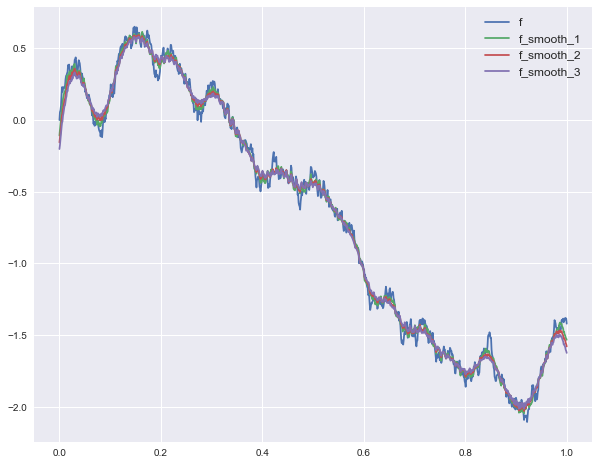

In [13]:
x = np.linspace(0, T, N)
plt.figure(figsize=(10, 8))
plt.plot(x, y, label='f')
for i in range(1, 4):
    f_smooth_i = repeated_smooth(f, i)
    y = [f_smooth_i(z) for z in x]
    plt.plot(x, y, label=f'f_smooth_{i}')
plt.legend(fontsize=12)
plt.show()